In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
df = pd.read_csv('oil_spill.csv')
print(df.shape)
df.head()

(937, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


There are 50 columns and 5 rows

#### Handling null values

In [462]:
df_null = df.isnull().sum()
df_null = df_null[df_null > 0] 
df_null
# there is no null values

Series([], dtype: int64)

#### Checking data type

In [463]:
df.dtypes.value_counts()

# all the data is either float or integer

float64    39
int64      11
dtype: int64

#### Checking values of Target Column

In [464]:
df['target'].value_counts()

0    896
1     41
Name: target, dtype: int64

#### Checking Duplicated data

In [465]:
df.duplicated().sum()

0

#### Removing the data with high correlation

In [547]:
a = df.corr()


In [550]:
def correlation(dataset, threshold):
    col_corr = set()                                        # creating a object (set) as there is no repetition in set
    for i in range(len(dataset.columns)):
        for j in range (i):
            if (dataset.iloc[i,j]) > threshold:             #all the index having greater value than the threshold
                colname = dataset.columns[i]                #creating object colname cosidering the columns name having greater value than threshold
                col_corr.add(colname)                       # adding it to the set created
    return list(col_corr)


In [551]:
corr_features = correlation(a, 0.85)
print(corr_features)

['f_13', 'f_18', 'f_20', 'f_49', 'f_16', 'f_24', 'f_44', 'f_6', 'f_34', 'f_9', 'f_25', 'f_35', 'f_43', 'f_21', 'f_32', 'f_40', 'f_36']


In [469]:
df1 = df.drop(['f_9', 'f_43', 'f_18', 'f_40', 'f_21', 'f_44', 'f_25', 'f_6', 'f_20', 'f_32', 'f_34', 'f_35', 'f_24', 'f_36', 'f_16', 'f_13', 'f_49'],axis=1)

In [470]:
print(df1.shape)
df1.head(5)

(937, 33)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_10,f_11,f_12,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,1,2558,1506.09,456.63,90,40.88,7.89,0.19,214.7,0.21,...,0.00,138.68,89,2850.00,1000.00,3.73,0,33243.19,65.74,1
1,2,22325,79.11,841.03,180,51.11,1.21,0.02,901.7,0.02,...,0.00,68.65,89,5750.00,11500.00,0.60,0,51572.04,65.73,0
2,3,115,1449.85,608.43,88,40.42,7.34,0.18,86.1,0.21,...,0.01,38.80,89,1400.00,250.00,9.33,1,31692.84,65.81,1
3,4,1201,1562.53,295.65,66,42.40,7.97,0.19,166.5,0.21,...,0.00,108.27,89,6041.52,761.58,13.33,1,37696.21,65.67,1
4,5,312,950.27,440.86,37,41.43,7.03,0.17,232.8,0.15,...,0.00,14.39,89,1320.04,710.63,2.58,0,29038.17,65.66,0


#### Selecting dependent(y) and independent(x) values

In [471]:
x= df1.drop(["target"], axis=1)
y= df1.target

print(x.shape)
print(y.shape)

(937, 32)
(937,)


#### Scaling 

In [472]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()

In [473]:
x_scaled = mmsc.fit_transform(x)

#### Splitting the data into train and test 

In [474]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=20)

In [475]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(702, 32) (702,)
(235, 32) (235,)


#### Import libraries and creating function for model evaluation

In [476]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [477]:
def eval_model(y_test,ypred):
    print('Confusion Matrix:\n', confusion_matrix(y_test,ypred))
    print('Classification Report:\n', classification_report(y_test,ypred))
    print('Accuracy Score:', accuracy_score(y_test,ypred))

def mscore(model):
    print('Training Score =', model.score(x_train,y_train))
    print('Testing Score =', model.score(x_test,y_test))

#### Trying Logistic Regression

In [478]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000 ,solver='liblinear',)

Training, Predicting and Evaluating data

In [479]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [480]:
ypred_lr = lr.predict(x_test)
ypred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [481]:
mscore(lr)

Training Score = 0.9658119658119658
Testing Score = 0.9319148936170213


In [482]:
eval_model(y_test,ypred_lr)

Confusion Matrix:
 [[218   0]
 [ 16   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       218
           1       1.00      0.06      0.11        17

    accuracy                           0.93       235
   macro avg       0.97      0.53      0.54       235
weighted avg       0.94      0.93      0.90       235

Accuracy Score: 0.9319148936170213


#### Trying Decision Tree Classifier

In [483]:
from sklearn.tree import DecisionTreeClassifier

In [484]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_split=15)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=15)

In [485]:
ypred_dtc = dtc.predict(x_test)
ypred_dtc

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [486]:
mscore(dtc)

Training Score = 0.9843304843304843
Testing Score = 0.9446808510638298


In [487]:
eval_model(y_test,ypred_dtc)

Confusion Matrix:
 [[215   3]
 [ 10   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       218
           1       0.70      0.41      0.52        17

    accuracy                           0.94       235
   macro avg       0.83      0.70      0.74       235
weighted avg       0.94      0.94      0.94       235

Accuracy Score: 0.9446808510638298


Plotting the Tree

In [488]:
from sklearn.tree import plot_tree

In [489]:
cn = ['0','1']
fn = x.columns
print(cn)
print(fn)

['0', '1']
Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_7', 'f_8', 'f_10', 'f_11', 'f_12',
       'f_14', 'f_15', 'f_17', 'f_19', 'f_22', 'f_23', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_33', 'f_37', 'f_38', 'f_39', 'f_41', 'f_42',
       'f_45', 'f_46', 'f_47', 'f_48'],
      dtype='object')


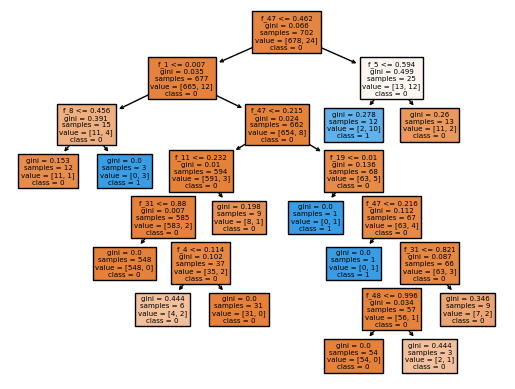

In [490]:
plot_tree(dtc,class_names=cn,feature_names=fn,filled=True)
plt.show()

#### Trying Random Forest

In [491]:
from sklearn.ensemble import RandomForestClassifier

In [492]:
rf = RandomForestClassifier(n_estimators=50,criterion='gini',min_samples_split=20,max_depth=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=50)

In [493]:
ypred_rf = rf.predict(x_test)
ypred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [494]:
mscore(rf)

Training Score = 0.9715099715099715
Testing Score = 0.9276595744680851


In [495]:
eval_model(y_test,ypred_rf)

Confusion Matrix:
 [[218   0]
 [ 17   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       218
           1       0.00      0.00      0.00        17

    accuracy                           0.93       235
   macro avg       0.46      0.50      0.48       235
weighted avg       0.86      0.93      0.89       235

Accuracy Score: 0.9276595744680851


c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Trying Bagging Classifier on Decision Tree

In [496]:
from sklearn.ensemble import BaggingClassifier

In [497]:
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=20,max_depth=10)
bg_dt = BaggingClassifier(base_estimator=dtree, n_estimators=15)

In [498]:
bg_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        min_samples_split=20),
                  n_estimators=15)

In [499]:
mscore(bg_dt)

Training Score = 0.9729344729344729
Testing Score = 0.9319148936170213


In [500]:
ypred_bgdt = bg_dt.predict(x_test)
ypred_bgdt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [501]:
eval_model(y_test,ypred_bgdt)

Confusion Matrix:
 [[216   2]
 [ 14   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       218
           1       0.60      0.18      0.27        17

    accuracy                           0.93       235
   macro avg       0.77      0.58      0.62       235
weighted avg       0.91      0.93      0.91       235

Accuracy Score: 0.9319148936170213


#### Trying Adaboost Classifier on Decision Tree

In [502]:
from sklearn.ensemble import AdaBoostClassifier

In [503]:
dtree_1 = DecisionTreeClassifier(criterion="entropy",min_samples_split=15,max_depth=10)
adbc = AdaBoostClassifier(base_estimator=dtree_1,n_estimators=30)

In [504]:
adbc.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_split=15),
                   n_estimators=30)

In [505]:
ypred_adbc = adbc.predict(x_test)
ypred_adbc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [506]:
mscore(adbc)

Training Score = 1.0
Testing Score = 0.9446808510638298


In [507]:
eval_model(y_test,ypred_adbc)

Confusion Matrix:
 [[218   0]
 [ 13   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       218
           1       1.00      0.24      0.38        17

    accuracy                           0.94       235
   macro avg       0.97      0.62      0.68       235
weighted avg       0.95      0.94      0.93       235

Accuracy Score: 0.9446808510638298


#### Checking the best Model

In [508]:
performance = {'LogReg' : accuracy_score(y_test,ypred_lr),
                  'Decision Tree' : accuracy_score(y_test,ypred_dtc),
                  'Random Forest' : accuracy_score(y_test,ypred_rf),
                  'Bagging' : accuracy_score(y_test,ypred_bgdt),
                  'Adaboost' : accuracy_score(y_test,ypred_adbc)}


result = pd.DataFrame(performance,index=['Accuracy'])
result.T    #transpose

,Accuracy
LogReg,0.931915
Decision Tree,0.944681
Random Forest,0.927660
Bagging,0.931915
Adaboost,0.944681


#### Getting Decision Tree Clasifier as the best Model

#### Saving the Model

In [509]:
# import the library
import pickle

In [511]:
pickle.dump(dtc, open('Decision_Tree.pkl','wb'))    #wb = write binary

#### Selecting 20 random data point

In [513]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [519]:
# Random_data = df.sample(20) # commenting out this as sample data changes when executed
print(Random_data.shape)
Random_data.head()

(20, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
774,42,25,65.68,275.40,63,202500,56.08,9.70,1858.0,0.17,...,804.98,254.56,104.71,97.24,7.69,0,2612.71,65.72,6.40,0
696,49,21,41.86,537.00,12,170100,68.43,15.10,1445.0,0.22,...,569.21,360.00,180.00,113.84,3.16,0,3580.89,66.06,6.06,0
601,33,12,122.83,578.33,76,97200,50.33,15.02,1064.0,0.30,...,569.21,90.00,60.00,46.48,9.49,1,4513.34,66.14,6.27,0
109,99,56,1732.82,1557.52,8,140000,38.32,4.53,1280.0,0.12,...,509.90,353.55,215.77,75.97,2.36,0,3664.41,66.33,7.93,0
69,59,400,1294.70,1256.43,66,1000000,39.10,6.95,8800.0,0.18,...,3178.05,492.44,259.19,111.11,12.26,1,6482.29,66.13,7.51,0


In [521]:
Random_data.reset_index()

,index,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,774,42,25,65.68,275.40,63,202500,56.08,9.70,1858.0,...,804.98,254.56,104.71,97.24,7.69,0,2612.71,65.72,6.40,0
1,696,49,21,41.86,537.00,12,170100,68.43,15.10,1445.0,...,569.21,360.00,180.00,113.84,3.16,0,3580.89,66.06,6.06,0
2,601,33,12,122.83,578.33,76,97200,50.33,15.02,1064.0,...,569.21,90.00,60.00,46.48,9.49,1,4513.34,66.14,6.27,0
3,109,99,56,1732.82,1557.52,8,140000,38.32,4.53,1280.0,...,509.90,353.55,215.77,75.97,2.36,0,3664.41,66.33,7.93,0
4,69,59,400,1294.70,1256.43,66,1000000,39.10,6.95,8800.0,...,3178.05,492.44,259.19,111.11,12.26,1,6482.29,66.13,7.51,0
5,802,70,30,27.30,435.73,2,243000,58.13,12.16,1932.0,...,810.00,360.00,180.00,90.00,4.50,0,2087.31,65.92,6.12,0
6,709,62,11,19.91,191.64,179,89100,74.27,8.89,847.0,...,540.00,90.00,60.00,46.48,9.00,1,21427.46,65.59,6.34,0
7,625,57,14,3.00,31.93,90,113400,57.14,7.52,1027.0,...,360.00,270.00,180.00,73.48,2.00,0,22809.90,65.37,6.45,0
8,800,68,13,24.69,477.00,67,105300,47.46,5.87,1101.0,...,569.21,180.00,75.00,67.75,7.59,0,2782.08,65.97,6.06,0
9,246,128,76,508.12,258.49,63,190000,37.33,1.56,2410.0,...,827.65,316.23,156.92,77.05,5.27,0,19959.22,65.52,6.93,0


#### Saving Random 20 data point to CSV file

In [522]:
# Random_data.to_csv("Random_20_data.csv", index=False)     # commenting out so that it doesnt run again and save file again.

#### Loading the Model

In [523]:
load_model = pickle.load(open('Decision_Tree.pkl','rb'))    # rb = read binary
print(load_model)

DecisionTreeClassifier(max_depth=20, min_samples_split=15)


#### Lets try Model on Sample Data

Importing Random_20_data as test_df and then will do all the necessary data_preprocessing

In [528]:
test_df = pd.read_csv('Random_20_data.csv')
print(test_df.shape)
test_df.head()

(20, 50)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,42,25,65.68,275.40,63,202500,56.08,9.70,1858.0,0.17,...,804.98,254.56,104.71,97.24,7.69,0,2612.71,65.72,6.40,0
1,49,21,41.86,537.00,12,170100,68.43,15.10,1445.0,0.22,...,569.21,360.00,180.00,113.84,3.16,0,3580.89,66.06,6.06,0
2,33,12,122.83,578.33,76,97200,50.33,15.02,1064.0,0.30,...,569.21,90.00,60.00,46.48,9.49,1,4513.34,66.14,6.27,0
3,99,56,1732.82,1557.52,8,140000,38.32,4.53,1280.0,0.12,...,509.90,353.55,215.77,75.97,2.36,0,3664.41,66.33,7.93,0
4,59,400,1294.70,1256.43,66,1000000,39.10,6.95,8800.0,0.18,...,3178.05,492.44,259.19,111.11,12.26,1,6482.29,66.13,7.51,0


Create another object and remove Target from dataframe

In [527]:
test_df1 = test_df.drop('target',axis=1)
test_df1.shape

(20, 49)

In [532]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     20 non-null     int64  
 1   f_2     20 non-null     int64  
 2   f_3     20 non-null     float64
 3   f_4     20 non-null     float64
 4   f_5     20 non-null     int64  
 5   f_6     20 non-null     int64  
 6   f_7     20 non-null     float64
 7   f_8     20 non-null     float64
 8   f_9     20 non-null     float64
 9   f_10    20 non-null     float64
 10  f_11    20 non-null     float64
 11  f_12    20 non-null     float64
 12  f_13    20 non-null     float64
 13  f_14    20 non-null     float64
 14  f_15    20 non-null     float64
 15  f_16    20 non-null     float64
 16  f_17    20 non-null     float64
 17  f_18    20 non-null     float64
 18  f_19    20 non-null     float64
 19  f_20    20 non-null     float64
 20  f_21    20 non-null     float64
 21  f_22    20 non-null     float64
 22  f_23

Removing Highly correlated columns that we removed from training data

In [552]:
test_df1.drop(['f_13', 'f_18', 'f_20', 'f_49', 'f_16', 'f_24', 'f_44', 'f_6', 'f_34', 'f_9', 'f_25', 'f_35', 'f_43', 'f_21', 'f_32', 'f_40', 'f_36'],axis=1,inplace= True)

Now lets use the model to predict the TArget variable and then we will compare

In [555]:
Prediction = load_model.predict(test_df1)
Prediction

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

COMPARE

In [565]:
Compare = {'Original' : test_df['target'],
                       'Prediction' : Prediction}

Result = pd.DataFrame(Compare)
Result

,Original,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


#### One Wrong Prediction at index 14